Other Example: https://github.com/ageron/handson-ml2/blob/master/18_reinforcement_learning.ipynb

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

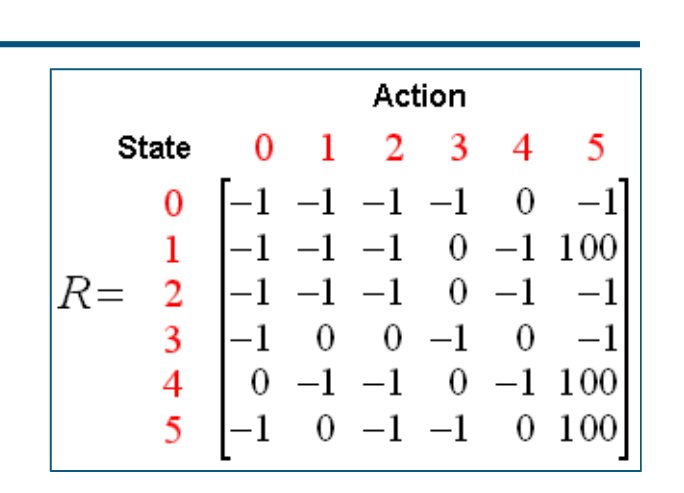

In [2]:
points_list = [(0,4),(1,3),(1,5),(2,3),(3,4),(5,4),(5,5)]

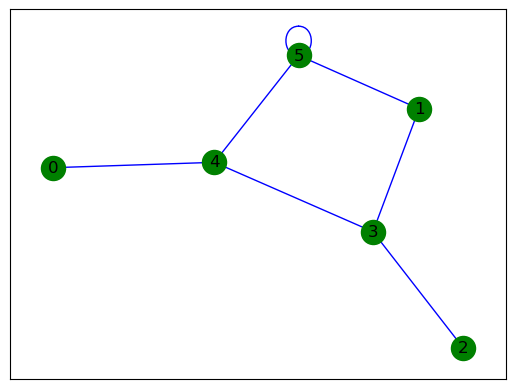

In [3]:
from networkx.drawing.nx_pylab import draw_networkx_labels
goal = 5
mapping = {0: "0" , 1: "1", 2: "2 -start", 3:"3", 4: "4", 5: "5-Goal state"}

G = nx.Graph()
G.add_edges_from(points_list)

pos = nx.spring_layout(G,k=0.5, center=points_list[2])
nx.draw_networkx_nodes(G,pos, node_color='g')
nx.draw_networkx_edges(G,pos, edge_color='b')
nx,draw_networkx_labels(G,pos)
plt.show()

In [4]:
NO_OF_POINTS = 6
R = np.matrix(np.ones((NO_OF_POINTS,NO_OF_POINTS)))
R *= -1
R

matrix([[-1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1.]])

In [5]:
points_list

[(0, 4), (1, 3), (1, 5), (2, 3), (3, 4), (5, 4), (5, 5)]

In [6]:
for point in points_list:
  print(point)
  if point[1] == goal:
    R[point] = 100
  else:
    R[point] = 0

  if point[0] == goal:
    R[point[::-1]] = 100
  else:
    R[point[::-1]] = 0

R[goal,goal] = 100
R

(0, 4)
(1, 3)
(1, 5)
(2, 3)
(3, 4)
(5, 4)
(5, 5)


matrix([[ -1.,  -1.,  -1.,  -1.,   0.,  -1.],
        [ -1.,  -1.,  -1.,   0.,  -1., 100.],
        [ -1.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,   0.,   0.,  -1.,   0.,  -1.],
        [  0.,  -1.,  -1.,   0.,  -1., 100.],
        [ -1.,   0.,  -1.,  -1.,   0., 100.]])

In [7]:
# Create Q Matrix
NO_OF_POINTS = 6
Q = np.matrix(np.zeros((NO_OF_POINTS,NO_OF_POINTS)))
gamma = 0.8

initial_state = 1

def available_actions(state):
  current_state_row = R[state]
  av_act = np.where(current_state_row >= 0)[1]
  return av_act

def sample_next_action(available_actions_range):
  next_action = int(np.random.choice(available_actions_range,1))
  return next_action

available_act = available_actions(initial_state)
print("available actions", available_act)
action = sample_next_action(available_act)
print("next action", action)

def update(current_state, action, gamma):

  max_index = np.where(Q[action,] == np.max(Q[action,]))[1]

  if max_index.shape[0] > 1:
      max_index = int(np.random.choice(max_index, size = 1))
  else:
      max_index = int(max_index)
  max_value = Q[action, max_index]

  Q[current_state, action] = R[current_state, action] + gamma * max_value
  print('max_value', R[current_state, action] + gamma * max_value)

  if (np.max(Q) > 0):
    return(np.sum(Q/np.max(Q)*100))
  else:
    return (0)

update(initial_state, action, gamma)

available actions [3 5]
next action 3
max_value 0.0


0

In [8]:
# Training
scores = []
for i in range(700):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)
    scores.append(score)

    print ('Score:', str(score))
    print("Trained Q matrix:")
    print(Q/np.max(Q)*100)

# Testing
current_state = 3
steps = [current_state]

while current_state != 5:

    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]

    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)

    steps.append(next_step_index)
    current_state = next_step_index

print(f"Selected path: {steps}")

max_value 0.0
Score: 0
Trained Q matrix:
[[nan nan nan nan nan nan]
 [nan nan nan nan nan nan]
 [nan nan nan nan nan nan]
 [nan nan nan nan nan nan]
 [nan nan nan nan nan nan]
 [nan nan nan nan nan nan]]
max_value 0.0
Score: 0
Trained Q matrix:
[[nan nan nan nan nan nan]
 [nan nan nan nan nan nan]
 [nan nan nan nan nan nan]
 [nan nan nan nan nan nan]
 [nan nan nan nan nan nan]
 [nan nan nan nan nan nan]]
max_value 0.0
Score: 0
Trained Q matrix:
[[nan nan nan nan nan nan]
 [nan nan nan nan nan nan]
 [nan nan nan nan nan nan]
 [nan nan nan nan nan nan]
 [nan nan nan nan nan nan]
 [nan nan nan nan nan nan]]
max_value 0.0
Score: 0
Trained Q matrix:
[[nan nan nan nan nan nan]
 [nan nan nan nan nan nan]
 [nan nan nan nan nan nan]
 [nan nan nan nan nan nan]
 [nan nan nan nan nan nan]
 [nan nan nan nan nan nan]]
max_value 0.0
Score: 0
Trained Q matrix:
[[nan nan nan nan nan nan]
 [nan nan nan nan nan nan]
 [nan nan nan nan nan nan]
 [nan nan nan nan nan nan]
 [nan nan nan nan nan nan]
 [nan na

/var/folders/xk/0pfb24315clcz5hhv8f69q5c0000gp/T/ipykernel_55168/637153330.py:12: RuntimeWarning: invalid value encountered in divide
  print(Q/np.max(Q)*100)


In [ ]:
point = (0,4)

In [ ]:
point

(0, 4)

In [ ]:
point[::-1]

(4, 0)